In [1]:
#To plot seasonal mean rainfall for a region
#Ideantify EXCESS and DEFICIT years (defined as above or below 1SD from mean, respectively)

Task: 1
1. Read data year by year
2. Select (slice) the duration (time) and region (longitude and latitude) of interest
3. Compute average of the selected data in step 2
4. Store averagred data in one time series
5. plot the data
6. Beautify the plot




Task: 2

7. Compute SD of the time series
8. Identify excess/flood and deficit/drought years
9. Mark the excess and deficit years in the data.





Task: 3 (optional)

10. Store the Excess(flood) and Deficit(drought) years
11. What is the structure of acssociated spatial structure of another data.

In [28]:
#importing necessary packages

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
from tqdm.notebook import tqdm
from datetime import datetime, timedelta

#Package to suppress Python warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#BEFORE ANALYSING THE DATA

#Study specifications

#Declaring start year and end year of my analysis
start_year = 1998
end_year   = 2019
end_year_idx = end_year+1

#Region boundaries
west_lon = 75.0
east_lon = 84.0
south_lat= 18.0
north_lat= 28.0

In [4]:
#A look at the data
#Note: We can use terminal comands in Jupyter notebook by using "!" sign
!ncdump -h /fs3/group/mullegrp/Bidyut_Goswami/OBS/TRMM/yearwise/TRMM_daily_0.25x0.25_1998.nc

netcdf TRMM_daily_0.25x0.25_1998 {
dimensions:
	time = UNLIMITED ; // (365 currently)
	lon = 1440 ;
	lat = 400 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:units = "hours since 1-1-1 00:00:00" ;
		time:calendar = "standard" ;
		time:axis = "T" ;
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float r(time, lat, lon) ;
		r:long_name = "Daily accumulated precipitation (combined microwave-IR) estimate with gauge calibration over land  [mm]" ;
		r:_FillValue = -9999.9f ;
		r:missing_value = -9999.9f ;

// global attributes:
		:CDI = "Climate Data Interface version 2.0.5 (https://mpimet.mpg.de/cdi)" ;
		:Conventions = "CF-1.6" ;
		:history = "Thu Oct 20 17:24:16 2022: cdo splityear ../TRMM_daily_0.25x0.25_1998-2019.nc TRMM_daily_0.25x0.25_\n

In [30]:
for i in range(start_year, end_year_idx):
    print (i)

1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [63]:
egu_start_day=datetime.strptime("14 Apr, 2024", "%d %b, %Y")

In [65]:
year_of_egu=egu_start_day.strftime("%Y")
print(year_of_egu)

2024


In [67]:
# 1. Read data year by year
# 2. Select (slice) the duration (time) and region (longitude and latitude) of interest
# 3. Compute average of the selected data in step 2


seasonal_mean=[]

for i in tqdm(range(start_year, end_year_idx)): #looping over files
    input_file=glob.glob('/fs3/group/mullegrp/Bidyut_Goswami/OBS/TRMM/yearwise/TRMM_daily_0.25x0.25_' + str(i) + '.nc');
    input_variable=xr.open_dataset(input_file[0]);
    
    season_start_day = datetime.strptime("01 Jun, "+str(i)+"", "%d %b, %Y");
    season_end_day   = datetime.strptime("30 Sep, "+str(i)+"", "%d %b, %Y");
        
    seasonal_mean_yearwise=input_variable.sel(time=slice(season_start_day,season_end_day),
                                              lon=slice(int(west_lon),int(east_lon)),
                                              lat=slice(int(south_lat),int(north_lat))).mean(dim=['time','lon','lat']);
    #Check area weighting
    seasonal_mean.append(seasonal_mean_yearwise);

  0%|          | 0/22 [00:00<?, ?it/s]

In [7]:
#At this point "seasonal_mean" is not a time series
seasonal_mean

[<xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 7.953,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 8.526,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 7.145,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 7.112,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 6.147,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 8.531,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 6.963,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 8.268,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 8.027,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 7.843,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 8.483,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     r        float32 6.424,
 <xarray.Dataset>
 Dimension

xarray.concat

Concatenate xarray objects along a new or existing dimension.

In [8]:
# 4. Store averagred data in one time series

# Concatenate xarray objects along a new or existing dimension.

seasonal_mean_timeseries=xr.concat(seasonal_mean,dim='year')
seasonal_mean_timeseries["year"]= np.arange(start_year,end_year_idx,1)

In [9]:
seasonal_mean_timeseries

<xarray.Dataset>
Dimensions:  (year: 22)
Coordinates:
  * year     (year) int64 1998 1999 2000 2001 2002 ... 2015 2016 2017 2018 2019
Data variables:
    r        (year) float32 7.953 8.526 7.145 7.112 ... 8.471 6.316 7.347 9.118

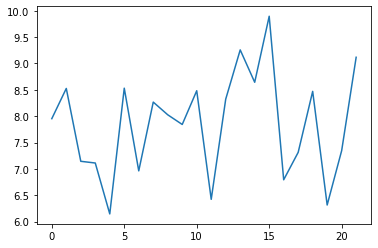

In [10]:
# 5. plot the data

plt.plot(seasonal_mean_timeseries['r'])


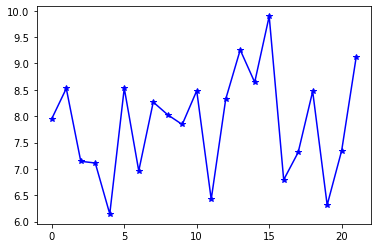

In [11]:
# 6. Beautify the plot

plt.plot(seasonal_mean_timeseries['r'],'b-*')


Text(0.5, 1.0, 'Interannual variability of Rainfall over the Region of interest')

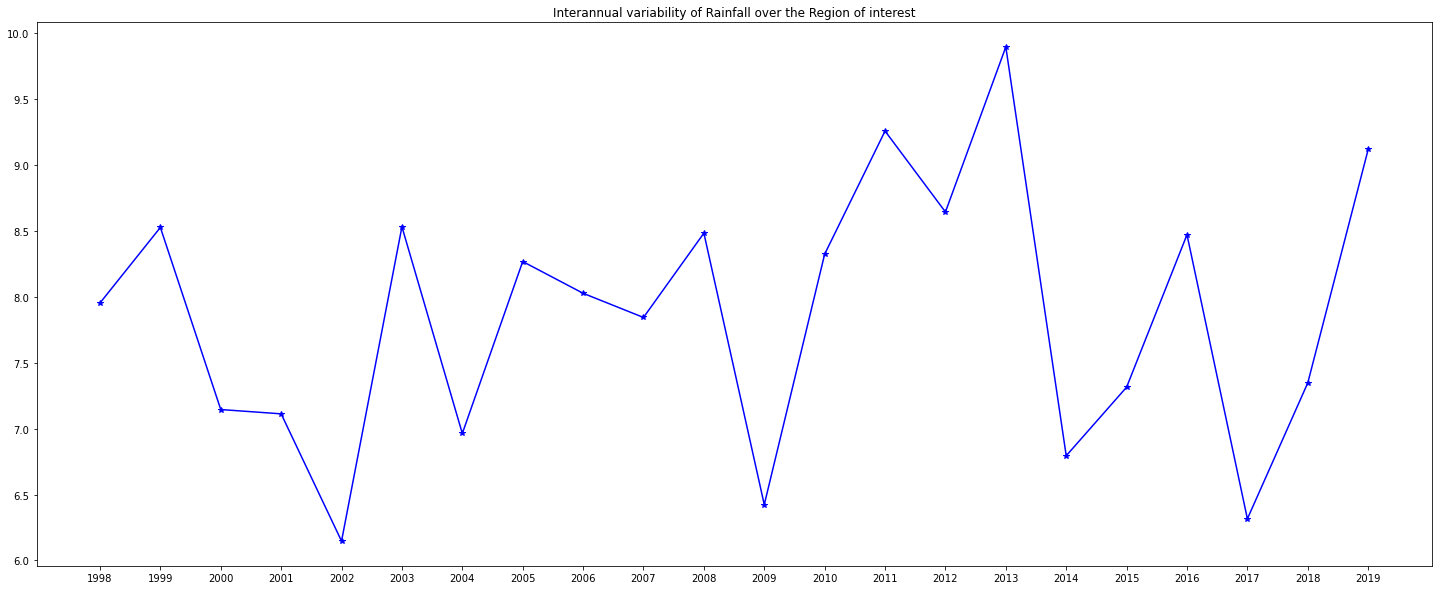

In [25]:
# 6. Beautify the plot
fig=plt.figure(figsize=(25,10))

plt.plot(seasonal_mean_timeseries['r'],'b-*')

default_x_ticks = range(len(seasonal_mean_timeseries['year'].values));
plt.xticks(default_x_ticks, seasonal_mean_timeseries['year'].values);

plt.title("Interannual variability of Rainfall over the Region of interest")

Text(0.5, 1.0, 'Interannual variability of Rainfall over the Region of interest')

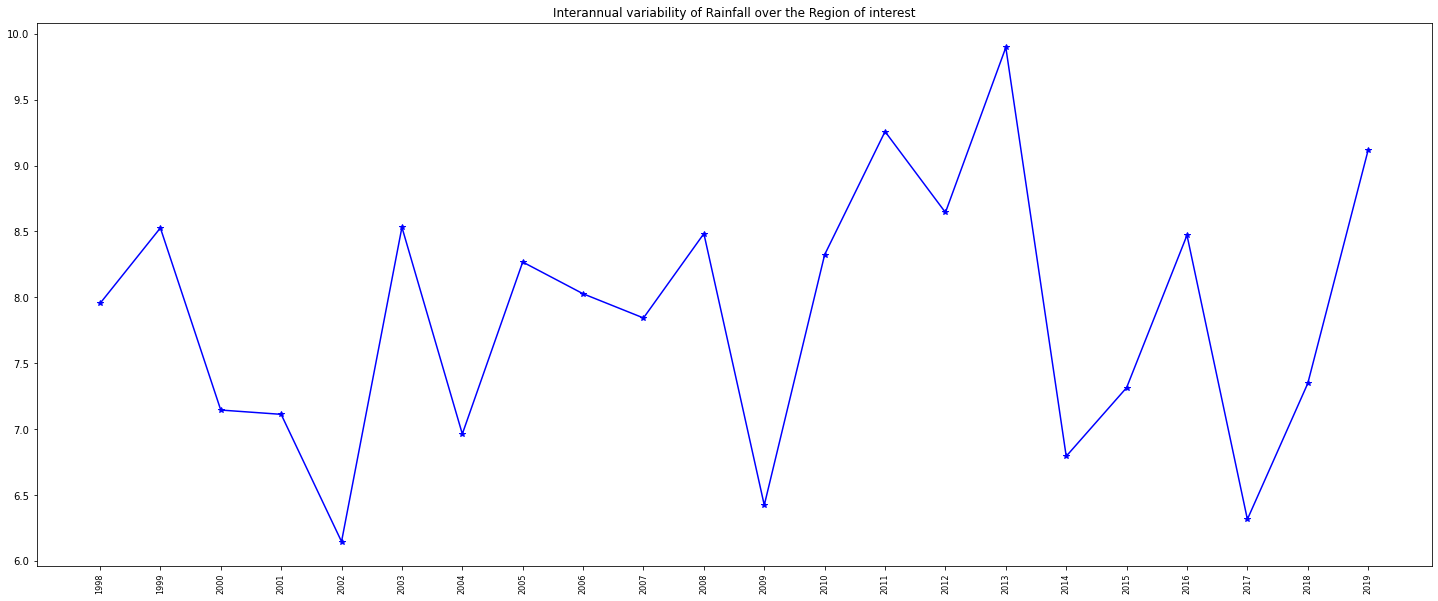

In [12]:
# 6. Beautify the plot
fig=plt.figure(figsize=(25,10))

plt.plot(seasonal_mean_timeseries['r'],'b-*')

default_x_ticks = range(len(seasonal_mean_timeseries['year'].values));
plt.xticks(default_x_ticks, seasonal_mean_timeseries['year'].values, rotation = 90,fontsize=8);

plt.title("Interannual variability of Rainfall over the Region of interest")

In [1]:
# 6. Beautify the plot
fig=plt.figure(figsize=(25,10))

plt.plot(seasonal_mean_timeseries['r'],color='k', marker='o',markersize=10,alpha=0.8,markerfacecolor='k')

default_x_ticks = range(len(seasonal_mean_timeseries['year'].values));
plt.xticks(default_x_ticks, seasonal_mean_timeseries['year'].values, rotation = 90,fontsize=20, weight = 'light');
plt.yticks(fontsize=20, weight = 'light');
plt.grid(alpha=0.3)
plt.title("Interannual variability of rainfall over the region of interest",fontsize=20)
plt.ylabel("mean rainfall", fontsize=20)


from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::2])
ax.xaxis.set_minor_locator(MultipleLocator(1))

NameError: name 'plt' is not defined

###################################################


Task: 2

7. Compute SD of the time series
8. Identify excess/flood and deficit/drought years
9. Mark the flood and drought years in the data.


###################################################

In [14]:
#Compute long-term mean and deviation

mean_of_seasonal_mean_timeseries=seasonal_mean_timeseries.mean(dim='year')
std_of_seasonal_mean_timeseries=seasonal_mean_timeseries.std(dim='year')

#Compute deviation in unid of sigma
dev_of_seasonal_mean_timeseries=(seasonal_mean_timeseries-mean_of_seasonal_mean_timeseries)/std_of_seasonal_mean_timeseries

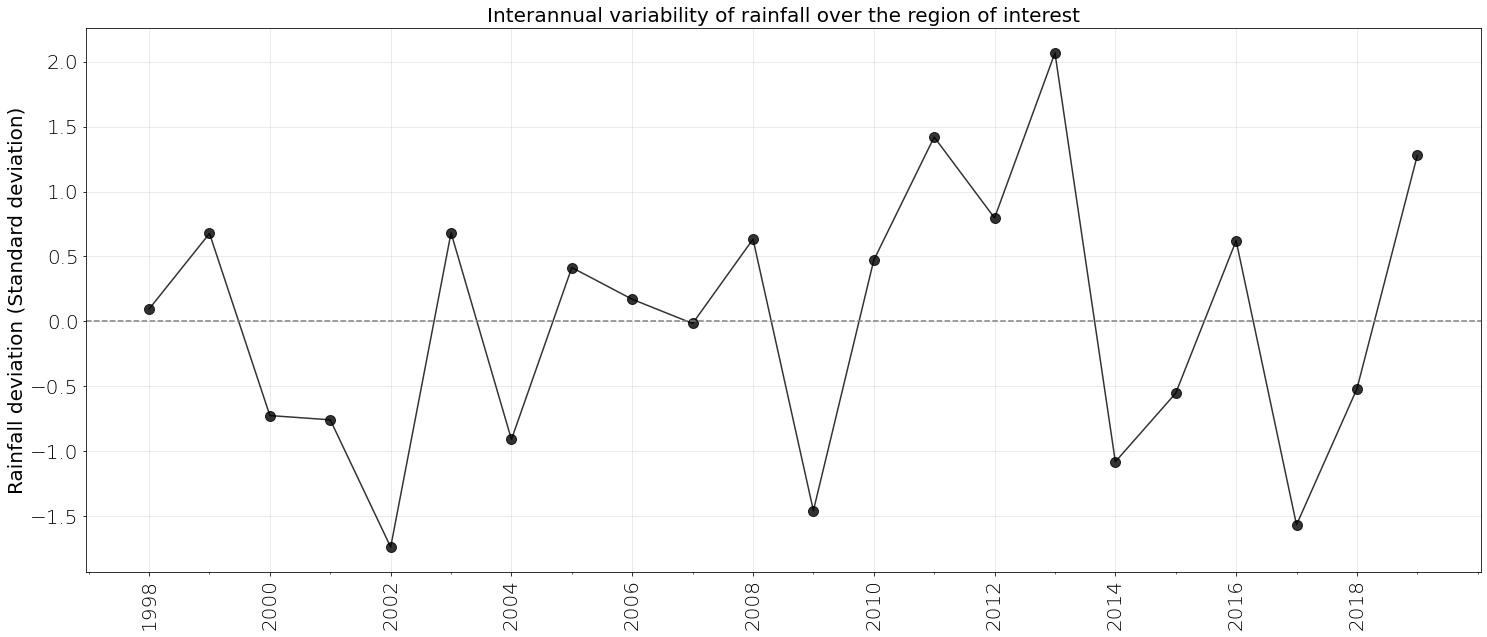

In [15]:
#Plot interannual variability (in terms of deviation from the long-term mean)
fig=plt.figure(figsize=(25,10))

plt.plot(dev_of_seasonal_mean_timeseries['r'],color='k', marker='o',markersize=10,alpha=0.8,markerfacecolor='k')

default_x_ticks = range(len(seasonal_mean_timeseries['year'].values));
plt.xticks(default_x_ticks, seasonal_mean_timeseries['year'].values, rotation = 90,fontsize=20, weight = 'light');
plt.yticks(fontsize=20, weight = 'light');
plt.grid(alpha=0.3)
plt.title("Interannual variability of rainfall over the region of interest",fontsize=20)
plt.ylabel("Rainfall deviation (Standard deviation)", fontsize=20)


##################################################
plt.axhline(y=0, color='grey', linestyle='--')  ;#
##################################################


from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::2])
ax.xaxis.set_minor_locator(MultipleLocator(1))

In [ ]:
# greater_than_threshold = [i for i, val in enumerate(rainfall_deviation_values) if val>threshold_flood]

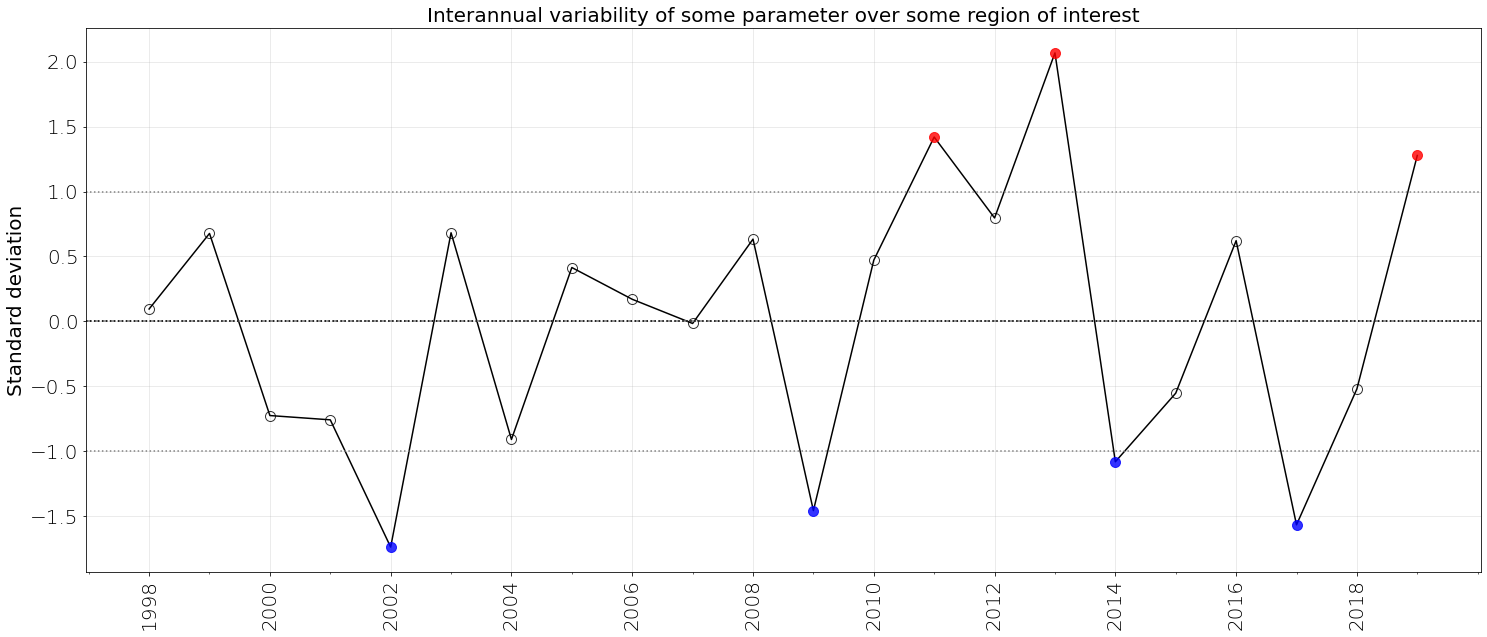

In [27]:
#Plot interannual variability (in terms of deviation from the long-term mean)

fig=plt.figure(figsize=(25,10))

##################################################
#plt.plot(dev_of_seasonal_mean_timeseries['rf'],color='k', marker='o',markersize=10,alpha=0.8,markerfacecolor='k')
plt.plot(dev_of_seasonal_mean_timeseries['r'],color='k')
##################################################

default_x_ticks = range(len(seasonal_mean_timeseries['year'].values));
plt.xticks(default_x_ticks, seasonal_mean_timeseries['year'].values, rotation = 90,fontsize=20, weight = 'light');
plt.yticks(fontsize=20, weight = 'light');
plt.grid(alpha=0.3)
plt.title("Interannual variability of some parameter over some region of interest",fontsize=20)
plt.ylabel("Standard deviation", fontsize=20)

plt.axhline(y=0, color='grey', linestyle='--') 

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::2])
ax.xaxis.set_minor_locator(MultipleLocator(1))



##################################################
########### Marking EXCESS & DEFICIT #############
##################################################
threshold_excess  =  1.0    ;# above 1 standard deviation
threshold_deficit = -1.0    ;# below -1 standard deviation

plt.axhline(y=0, color='k', linestyle=':')
plt.axhline(y=threshold_flood, color='gray', linestyle=':')
plt.axhline(y=threshold_drought, color='gray', linestyle=':')

rainfall_deviation_values = dev_of_seasonal_mean_timeseries['r']

greater_than_threshold = [i for i, val in enumerate(rainfall_deviation_values) if val>threshold_excess]
smaller_than_threshold = [i for i, val in enumerate(rainfall_deviation_values) if val<threshold_deficit]
within_threshold = [i for i, val in enumerate(rainfall_deviation_values) if val<threshold_excess and val>threshold_deficit]

plt.plot(greater_than_threshold, rainfall_deviation_values[greater_than_threshold], 
        linestyle='none', color='r', marker='o',markersize=10,alpha=0.8,markerfacecolor='r')

plt.plot(smaller_than_threshold, rainfall_deviation_values[smaller_than_threshold], 
        linestyle='none', color='b', marker='o',markersize=10,alpha=0.8,markerfacecolor='b')

plt.plot(within_threshold, rainfall_deviation_values[within_threshold], 
        linestyle='none', color='k', marker='o',markersize=10,alpha=0.8,markerfacecolor='none')

##################################################


plt.savefig('EGU_Figure_1.pdf', format='pdf', dpi=1200) ;#Publication ready


In [21]:
#Task 3

In [22]:

##The COOLEST part

excess_years=dev_of_seasonal_mean_timeseries['year'].values[greater_than_threshold[:]]
deficit_years=dev_of_seasonal_mean_timeseries['year'].values[smaller_than_threshold[:]]

# #############################################################################################################

# Suppose I want to save only those years during  1971-1990

# yrstart=np.where((dev_of_seasonal_mean_timeseries.year.values==1971).squeeze() > 0)[0][0]
# yrend=np.where((dev_of_seasonal_mean_timeseries.year.values==1990).squeeze() > 0)[0][0]

# yrstart_idx=np.where((greater_than_threshold[:]>yrstart)> 0)[0][0]
# yrend_idx=np.where((greater_than_threshold[:]>yrend)> 0)[0][0]

# excess_years=dev_of_seasonal_mean_timeseries['year'].values[greater_than_threshold[yrstart_idx:yrend_idx]]
# deficit_years=dev_of_seasonal_mean_timeseries['year'].values[smaller_than_threshold[yrstart_idx:yrend_idx]]
# #############################################################################################################

print(excess_years)
print(deficit_years)

[2011 2013 2019]
[2002 2009 2014 2017]


In [23]:
%store excess_years
%store deficit_years

Stored 'excess_years' (ndarray)
Stored 'deficit_years' (ndarray)


###Primer on "enumerate"

In [143]:
sample_series = ([-10,5,1,-2,7])

In [144]:
# printing the elements directly
for elements in enumerate(sample_series):
    print(elements)

(0, -10)
(1, 5)
(2, 1)
(3, -2)
(4, 7)


In [145]:
my_list = [i+5 for i, val in enumerate(sample_series) if val>0]
my_list

[6, 7, 9]

In [146]:
my_list = [i**3 for i, val in enumerate(sample_series) if val<0]
my_list

[0, 27]